# Data Science and Business Analytics Internship | GRIP August 2021

## The Sparks Foundation

### `Task - 2 : Analysing and Classifying Iris Into Different Species Using Unsupervised Machine Learning`

## Project Submitted By : Bipul Harsh

In [35]:
# Importing required modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.pipeline import make_pipeline

# 1 Fetching and Analysing Iris Dataset

In [2]:
df = pd.read_csv("./Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


## 1.1 Checking for Values of Different Features

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


Apart form `Id` and `Species` which are of `int` and `object` type respectively, the rest features which actually seems to be the main features are of `float` type containing data in cms.

Also none of them containing any null value which saves us from perfoming the Data Completion task.

## 1.2 Identifying Trend in Values of Different Features

In [4]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


Here SepalLength, SepalWidth, and PetalWidth has very less standard deviation which means that data are spread over a small range and are close with each other. While PetalWidth has a comparitively large Standard Deviation which means that data are spread over large range. Please note that I am making my observation by putting data on a 1D space of each features.

From above observation, we can make few assumptions:
- PetalLength with any other feature can give a good result of separating the data into different category.
- While any features with SepalWidth might give poor result of seperating data into different category, as here there are high chances of data of one region to get partially overlap with data of other region.

## 1.3 Visualising Above Assumptions

We will now try to visualise our assumptions with `Pair Plot`.

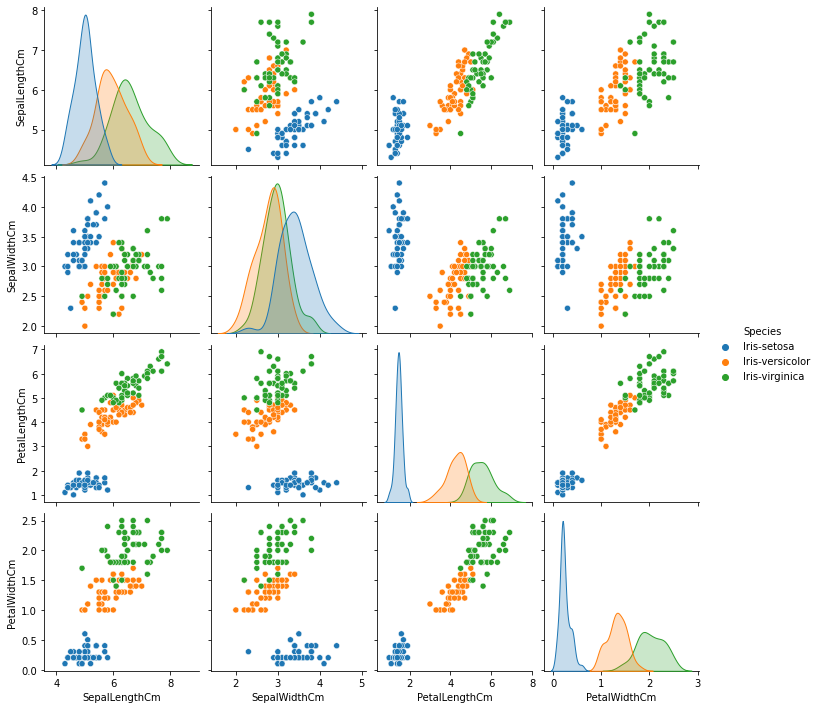

In [7]:
plotting_dataset = df.drop('Id', axis=1)
sns.pairplot(plotting_dataset, hue="Species")

The plot supports our assumptions we made above as we can see:
- That features with Petal Length gives good result of seperating the iris into different species/category
- While in case of Sepal Width not all, but with Sepal Length gives poor result of splitting the iris into different species.

We also observe that the iris-setosa has isolated its region from other category regions in all the cases. While Iris-versicolor and Iris-virginica can be seen partially and fully overlapping with each other in most of the cases.

This will help our model to categorise the Iris-setosa with high accuracy while with Iris-versicolor and Iris-virginica it might struggle a bit for boundary line values.

# 2 Building KMeans Model

## 2.1 Analysing Cluster Size (Task Objective)

For analysing the right and optimised cluster number we will be using `Inertia and Elbow Method`.

Inertia is sum of squared distance between of sample to their closest cluster center. Our goal is to have this value as small as possible but in an optmised manner. So we cannot say 0 inertia value as best because it will make each data point as different category.

Now as the number of clusters has negative coorelation with inertial value, so small inertial means higher cluster number. Our task here is to plot the inertia value based on different Cluster size and try to find a elbow point in it.

In [23]:
# Splitting dataset and Removing unwanted features
X = df.drop(['Id', "Species"], axis=1)
y = df.Species

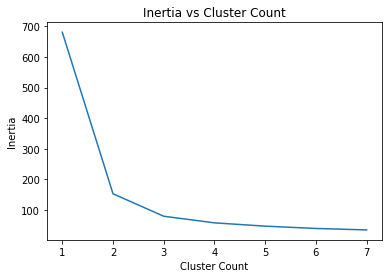

In [42]:
#Creating inertia record and plot final array
inertia_record = list()

for cluster_count in range(1, 8):
    kmeans = KMeans(n_clusters=cluster_count)
    kmeans.fit(X)
    inertia_record.append(kmeans.inertia_)

plt.figure()
plt.plot(np.arange(1, 8), inertia_record)
plt.xlabel("Cluster Count")
plt.ylabel("Inertia")
plt.title("Inertia vs Cluster Count")
plt.show()

In above plot, 2 can be seen as a good elbow point this is happen because of the partial overlapping of Iris-versicolor and Iris-virginica. Our goal is to find elbow point after which improvement in the inertia value is not significant, but in case of taking 2 we can see some significant point of imporvement in inertia value on going to 3 and after it things get very linear. So 3 here seems to be a good elbow point and cluster count to fit our model.

## 2.2 Scalling Data with Standard Scaler and Fitting Model
It will remove the mean and divide the value by standard deviation through which the value in each features column will now scale from 0 to 1. Here the mean and standard deviation will be different for different features. Here we will try to chain it up with fitting of KMeans model with given data with help of Pipeline.

In [20]:
std_scaler = StandardScaler()
kmeans = KMeans(n_clusters = 3)
pipeline = make_pipeline(std_scaler, kmeans)
pipeline.fit(X)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kmeans', KMeans(n_clusters=3))])

In [40]:
y_pred = pipeline.predict(X)

In [39]:
print(pd.crosstab(pipeline.predict(X), df['Species']))

Species  Iris-setosa  Iris-versicolor  Iris-virginica
row_0                                                
0                  0               11              36
1                 50                0               0
2                  0               39              14


Our model has successfully categoriesed all iris of Setosa species with label 1, but it struggled in categorising Iris-Versicolor and Iris-Virginica. 11 out of 50 data belongs to Iris-versicolor are predicted to be of Iris-virginica and 14/50 of Virginica categorised as Versicolor.

# Model Output Analysation

On our analysis of pair plot, we found that the PetalLength with other features gives clear separation. We will be using PetalWidth as second axis.

<AxesSubplot:xlabel='PetalLengthCm', ylabel='PetalWidthCm'>

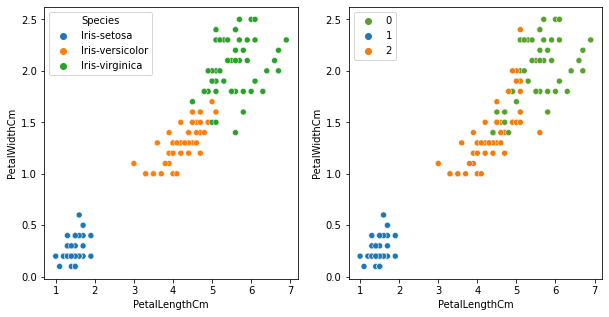

In [57]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x = df.PetalLengthCm, y = df.PetalWidthCm, hue=df.Species, ax=plt.subplot(1,2,1))
sns.scatterplot(x = df.PetalLengthCm, y = df.PetalWidthCm, hue=y_pred, ax=plt.subplot(1,2,2), palette={1:"#1F77B4", 2:"#F27C0C", 0:"#56A22C"})

We can see that output supports the analysis we done above.